<a href="https://colab.research.google.com/github/Akramraza12349/Projects/blob/main/Linear_Regression_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing Multiple Linear Regression

# Objective
  To Predict the profit made by a startup on the basis of expenses incurred and the state where they operate
  

In [ ]:
#  importing the libraries

import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path="/content/drive/MyDrive/AlmaBetter/Machine Learning/50_Startups.csv"

In [ ]:
data_set=pd.read_csv(file_path)

In [ ]:
data_set.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data_set.shape

(50, 5)

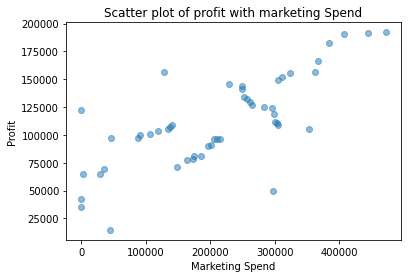

In [ ]:
plt.scatter(data_set['Marketing Spend'],data_set['Profit'],alpha=0.5)
plt.title('Scatter plot of profit with marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

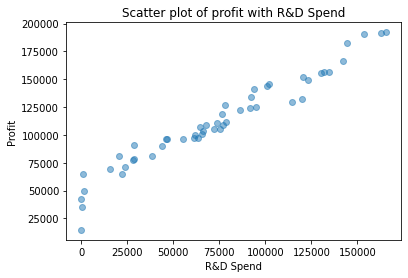

In [ ]:
plt.scatter(data_set['R&D Spend'],data_set['Profit'],alpha=0.5)
plt.title('Scatter plot of profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

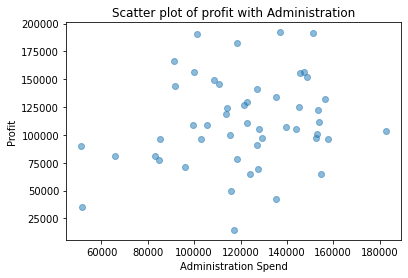

In [ ]:
plt.scatter(data_set['Administration'],data_set['Profit'],alpha=0.5)
plt.title('Scatter plot of profit with Administration')
plt.xlabel('Administration Spend')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

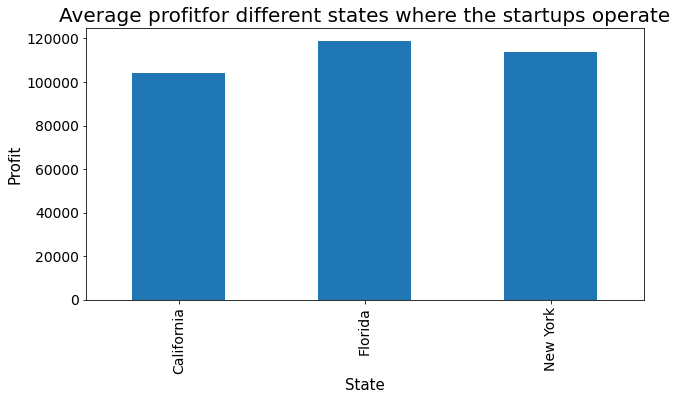

In [ ]:
# Create the figure object
ax=data_set.groupby(['State'])['Profit'].mean().plot.bar(figsize=(10,5),fontsize=14)


# set the title
ax.set_title('Average profitfor different states where the startups operate',fontsize=20)
 # set x and y label
ax.set_xlabel('State',fontsize=15)
ax.set_ylabel('Profit',fontsize=15)

In [ ]:
# No of startups in different states
data_set['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [ ]:
data_set['NewYork_State']=np.where(data_set['State']=='New York',1,0)
data_set['California_state'] = np.where(data_set['State']=='California',1,0)
data_set['Florida_state']=np.where(data_set['State']=='Florida',1,0)

# Drop the original column state from the data frame
data_set.drop(columns=['State'],inplace=True)


In [ ]:
data_set.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_state,Florida_state
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [ ]:
dependent_variable='Profit'

In [ ]:
data_set.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_state,Florida_state
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [ ]:
# create list of independent variables
Independent_variables=list(set(data_set.columns.to_list())-{dependent_variable})

In [ ]:
Independent_variables

['Marketing Spend',
 'Florida_state',
 'California_state',
 'Administration',
 'NewYork_State',
 'R&D Spend']

In [ ]:
# create the data of Independent variables
x=data_set[Independent_variables].values

# create the dependent variable data
y=data_set[dependent_variable].values

In [ ]:
# splitting the data into the training set and test set
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
# Transforming the data
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [ ]:
X_train

array([[0.45494286, 1.        , 0.        , 0.48655174, 0.        ,
        0.33561668],
       [0.43561799, 0.        , 0.        , 0.3173015 , 1.        ,
        0.2782839 ],
       [0.28413435, 1.        , 0.        , 0.87258866, 0.        ,
        0.45557444],
       [0.44680961, 0.        , 1.        , 1.        , 0.        ,
        0.2807759 ],
       [0.62511553, 1.        , 0.        , 0.59103645, 0.        ,
        0.55488118],
       [0.68649342, 1.        , 0.        , 0.88568959, 0.        ,
        0.7880179 ],
       [0.54370828, 1.        , 0.        , 0.98922572, 0.        ,
        0.72539353],
       [0.0040356 , 0.        , 0.        , 0.6847981 , 1.        ,
        0.0060492 ],
       [0.        , 0.        , 0.        , 0.00432296, 1.        ,
        0.00327821],
       [0.22709197, 0.        , 0.        , 0.95618996, 1.        ,
        0.39676926],
       [0.55486446, 0.        , 0.        , 0.67036159, 1.        ,
        0.69261666],
       [0.19316302, 1

In [ ]:
# fitting the multiple Linear regression to the training set
regressor=LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#  to find the intercept
regressor.intercept_

44153.95466784856

In [ ]:
# to find the coefficients
regressor.coef_

array([ 1.72720281e+04, -8.72645791e+02,  8.66383692e+01,  3.49927567e+03,
        7.86007422e+02,  1.27892182e+05])

In [ ]:
# to predict the independent variable
regressor.predict(X_train)

array([ 95764.42320496,  89164.62849777, 109506.72329085,  91366.2188941 ,
       127111.48666646, 159019.04337114, 148905.9881254 ,  48179.60744028,
        45374.34722508, 102951.9596798 , 145449.63178399,  96684.71387299,
        97535.3576194 , 116571.15139254,  69421.13311312, 116212.62095133,
        60736.53267612, 152787.95464277, 127413.0337311 , 102210.16391827,
       161822.7226407 , 131583.61511491,  75019.09161337,  48054.91969394,
       189547.28196893, 127528.92248422,  85540.50570954, 111255.8251405 ,
       156191.10124356, 108464.25100331,  75306.81185049, 119915.38726755,
       115144.58914955, 152688.90677959,  81513.47163492,  57298.28613018,
       172852.28336637, 192919.57537462,  47007.62737751,  65835.99435878])

In [ ]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [ ]:
# predicting the test set with rsults
y_pred=regressor.predict(X_test)

In [ ]:
# predicted profit on the test data 
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [ ]:
# Actual profit on the test data 
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [ ]:
# applying MSE 
mean_squared_error(y_test,y_pred)

83502864.03257732

In [ ]:
# applying RMSE
math.sqrt(mean_squared_error(y_test,y_pred))

9137.990152794942

In [ ]:
y_pred_train=regressor.predict(X_train)

In [ ]:
r2_score(y_train,y_pred_train)

0.9501847627493607

In [ ]:
# finding the R2 score
r2_score(y_test,y_pred)

0.9347068473282425